<a href="https://colab.research.google.com/github/sambhajizambre/Project/blob/main/Sentiment%20analysis%20for%20US%20Airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment analysis of US airline **** **

# *Problem Statement
Objective

You are given a data of US Airline tweets and their sentiment. The task is to do sentiment analysis about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").
*

In [10]:
#importing req. Lib.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [11]:
#load our data set
data = pd.read_csv('/content/drive/MyDrive/python/Tweets.csv')
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9200,5.700714e+17,negative,1.0000,Can't Tell,0.6780,US Airways,NaN,elysebeme,NaN,0,"@USAirways yes, but I had to pay more for anot...",NaN,2015-02-23 20:02:55 -0800,NaN,NaN
9201,5.700711e+17,negative,0.6669,Flight Booking Problems,0.6669,US Airways,NaN,marisa_negri,NaN,0,"@USAirways Well, that's a problem considering ...",NaN,2015-02-23 20:01:49 -0800,"Austin, TX | Atlanta, GA",Eastern Time (US & Canada)
9202,5.700709e+17,neutral,0.6353,NaN,0.0000,US Airways,NaN,caneryilmz,NaN,0,@USAirways but i bougth mc caren to jfk with s...,NaN,2015-02-23 20:01:15 -0800,NaN,NaN
9203,5.700704e+17,negative,1.0000,Flight Booking Problems,0.6703,US Airways,NaN,caneryilmz,NaN,0,@USAirways it is my fault but i bought online ...,NaN,2015-02-23 19:59:21 -0800,NaN,NaN


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
data.shape

(9205, 15)

In [13]:
#checking null values in our data
data.isnull().sum()

tweet_id                           0
airline_sentiment                  0
airline_sentiment_confidence       0
negativereason                  4077
negativereason_confidence       3151
airline                            0
airline_sentiment_gold          9184
name                               0
negativereason_gold             9188
retweet_count                      0
text                               0
tweet_coord                     8515
tweet_created                      0
tweet_location                  2879
user_timezone                   2890
dtype: int64

In [14]:
#checking info our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9205 entries, 0 to 9204
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      9205 non-null   float64
 1   airline_sentiment             9205 non-null   object 
 2   airline_sentiment_confidence  9205 non-null   float64
 3   negativereason                5128 non-null   object 
 4   negativereason_confidence     6054 non-null   float64
 5   airline                       9205 non-null   object 
 6   airline_sentiment_gold        21 non-null     object 
 7   name                          9205 non-null   object 
 8   negativereason_gold           17 non-null     object 
 9   retweet_count                 9205 non-null   int64  
 10  text                          9205 non-null   object 
 11  tweet_coord                   690 non-null    object 
 12  tweet_created                 9205 non-null   object 
 13  twe

tweet_created column got the date recorts and showing type is object we have to change it of date time format

In [20]:
data['tweet_created'] = pd.to_datetime(data['tweet_created'],utc=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9205 entries, 0 to 9204
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   tweet_id                      9205 non-null   float64            
 1   airline_sentiment             9205 non-null   object             
 2   airline_sentiment_confidence  9205 non-null   float64            
 3   negativereason                5128 non-null   object             
 4   negativereason_confidence     6054 non-null   float64            
 5   airline                       9205 non-null   object             
 6   airline_sentiment_gold        21 non-null     object             
 7   name                          9205 non-null   object             
 8   negativereason_gold           17 non-null     object             
 9   retweet_count                 9205 non-null   int64              
 10  text                          9205 n

Treating with null values

In [22]:
data.isna().sum()
print("Percentage null or na values in df")
((data.isnull() | data.isna()).sum() * 100 / data.index.size).round(2)

Percentage null or na values in df


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  44.29
negativereason_confidence       34.23
airline                          0.00
airline_sentiment_gold          99.77
name                             0.00
negativereason_gold             99.82
retweet_count                    0.00
text                             0.00
tweet_coord                     92.50
tweet_created                    0.00
tweet_location                  31.28
user_timezone                   31.40
dtype: float64

airline_sentiment_gold, negativereason_gold have more than 99% missing data And tweet_coord have nearly 93% missing data. It will be better to delete these columns as they will not provide any constructive information

In [23]:
del data['tweet_coord']
del data['airline_sentiment_gold']
del data['negativereason_gold']
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 19:35:52+00:00,NaN,Eastern Time (US & Canada)
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 19:15:59+00:00,NaN,Pacific Time (US & Canada)
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 19:15:48+00:00,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 19:15:36+00:00,NaN,Pacific Time (US & Canada)
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 19:14:45+00:00,NaN,Pacific Time (US & Canada)


In [25]:
freq = data.groupby('negativereason').size()
freq

negativereason
Bad Flight                      393
Can't Tell                      772
Cancelled Flight                418
Customer Service Issue         1399
Damaged Luggage                  51
Flight Attendant Complaints     278
Flight Booking Problems         292
Late Flight                     986
Lost Luggage                    442
longlines                        97
dtype: int64

we cant fill it will affect in bad way for example we have positive review and we fill the values with mode that means with Customer Service Issue it is missmatch and can be affect on train model so we keep the data as it is.

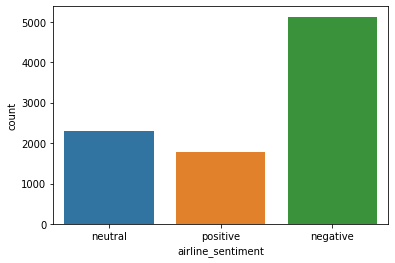

In [27]:
ax = sns.countplot(x="airline_sentiment", data=data)

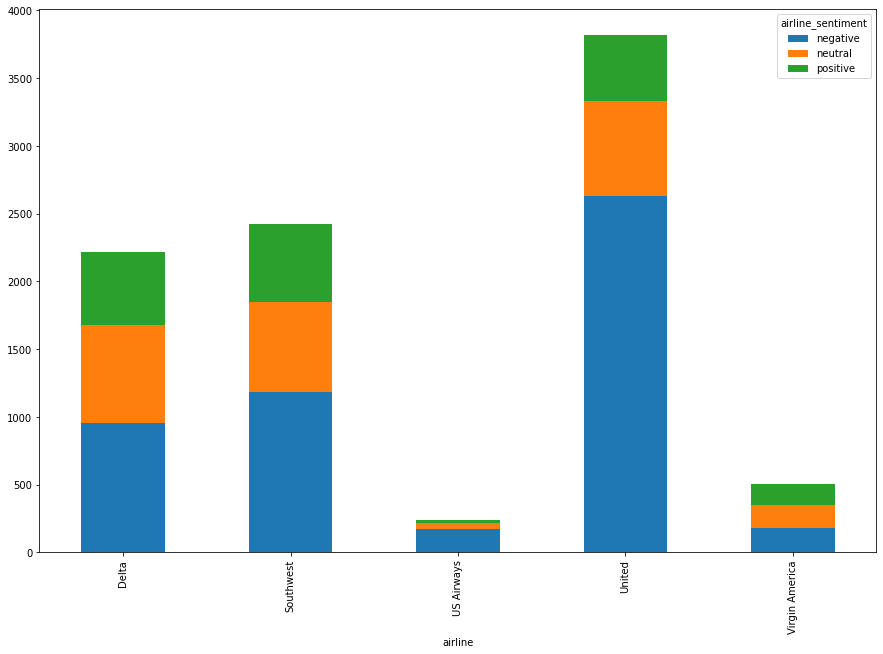

In [28]:
figure_2 = data.groupby(['airline', 'airline_sentiment']).size()
figure_2.unstack().plot(kind='bar', stacked=True, figsize=(15,10))

In [29]:
print(figure_2)

airline         airline_sentiment
Delta           negative              953
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative              175
                neutral                44
                positive               20
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
dtype: int64


# people complained for many reasons about their flights; 10 reasons to be specific

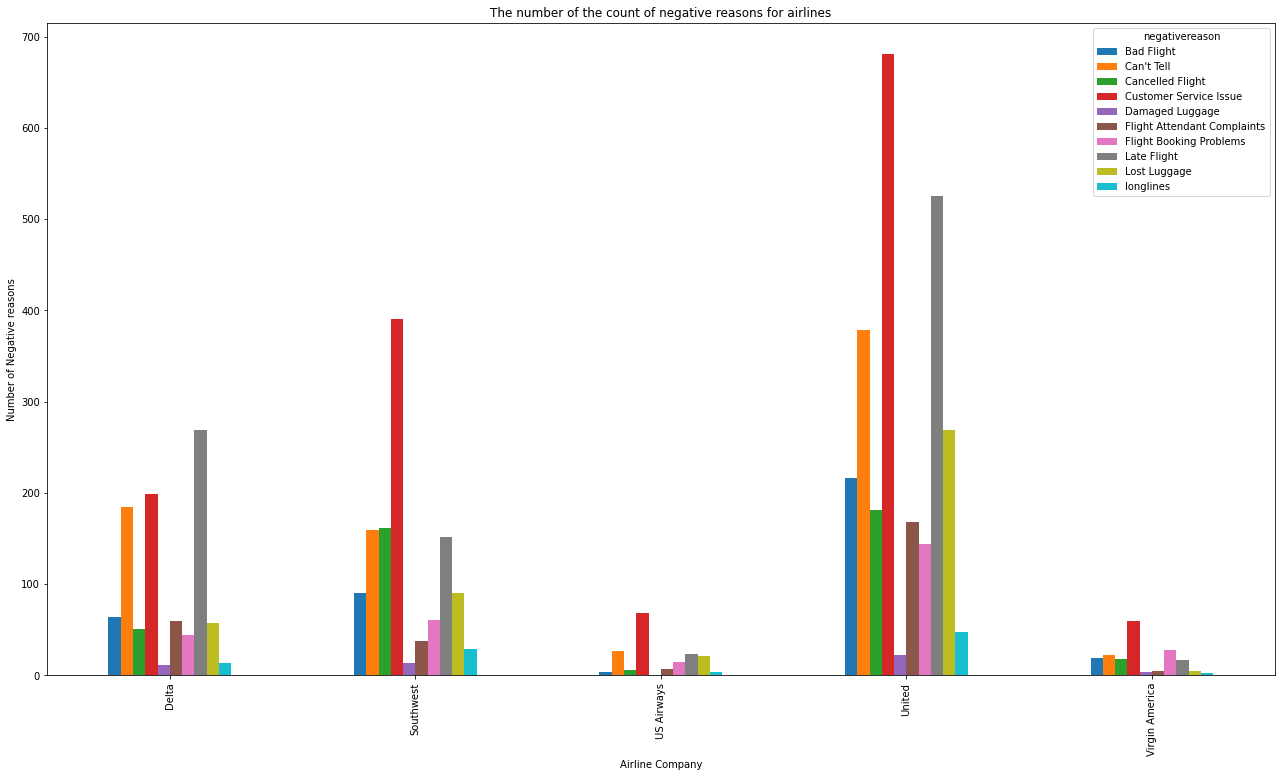

In [30]:
negative_reasons = data.groupby('airline')['negativereason'].value_counts(ascending=True)
negative_reasons.groupby(['airline','negativereason']).sum().unstack().plot(kind='bar',figsize=(22,12))
plt.xlabel('Airline Company')
plt.ylabel('Number of Negative reasons')
plt.title("The number of the count of negative reasons for airlines")
plt.show()

# What are the reasons for negative sentimental tweets for each airline ?
We will explore the negative reason column of our dataframe to extract conclusions about negative sentiments in the tweets by the customers

NameError: ignored

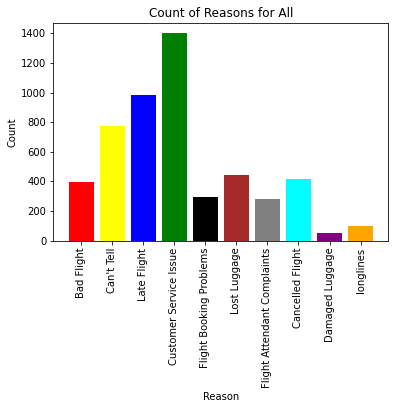

<Figure size 936x936 with 0 Axes>

In [34]:
#get the number of negative reasons
data['negativereason'].nunique()

NR_Count=dict(data['negativereason'].value_counts(sort=False))
def NR_Count(Airline):
    if Airline=='All':
        a=data
    else:
        a=data[data['airline']==Airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(data['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame
def plot_reason(Airline):
    
    a=NR_Count(Airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)
    
plot_reason('All')
plt.figure(2,figsize=(13, 13))
for i in airline:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

# **Is there a relationship between negative sentiments and date?
It will be interesting to see if the date has any effect on the sentiments of the tweets(especially negative !). We can draw various coclusions by visualizing this.**

In [35]:
date = data.reset_index()
#convert the Date column to pandas datetime
date.tweet_created = pd.to_datetime(date.tweet_created)
#Reduce the dates in the date column to only the date and no time stamp using the 'dt.date' method
date.tweet_created = date.tweet_created.dt.date
date.tweet_created.head()
df = date
day_df = df.groupby(['tweet_created','airline','airline_sentiment']).size()
# day_df = day_df.reset_index()
day_df

tweet_created  airline         airline_sentiment
2015-02-17     Delta           negative              51
                               neutral               63
                               positive              47
               Southwest       negative             162
                               neutral               69
                                                   ... 
2015-02-24     United          neutral               88
                               positive              55
               Virgin America  negative              15
                               neutral               15
                               positive              19
Length: 100, dtype: int64

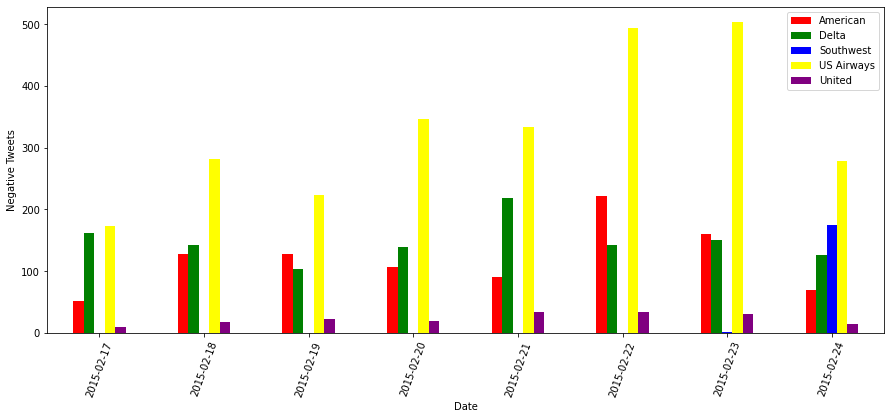

In [36]:
day_df = day_df.loc(axis=0)[:,:,'negative']

#groupby and plot data
ax2 = day_df.groupby(['tweet_created','airline']).sum().unstack().plot(kind = 'bar', color=['red', 'green', 'blue','yellow','purple','orange'], figsize = (15,6), rot = 70)
labels = ['American','Delta','Southwest','US Airways','United','Virgin America']
ax2.legend(labels = labels)
ax2.set_xlabel('Date')
ax2.set_ylabel('Negative Tweets')
plt.show()

1.Interestingly, American has a sudden upsurge in negative sentimental tweets on 2015-02-23, which reduced to half the very next day 2015-02-24. (I hope American is doing better these days and resolved their Customer Service Issue as we saw before)

2.Virgin America has the least number of negative tweets throughout the weekly data that we have. It should be noted that the total number of tweets for Virgin America was also significantly less as compared to the rest airlines, and hence the least negative tweets.

3.The negative tweets for all the rest airlines is slightly skewed towards the end of the week !

# **Dropng the rows with neutral sentiments**

In [37]:
data.drop(data.loc[data['airline_sentiment']=='neutral'].index, inplace=True)

# **Label encoding on airline_sentiment**

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['airline_sentiment'])

data['airline_sentiment_encoded'] = le.transform(data['airline_sentiment'])
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone,airline_sentiment_encoded
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 19:15:59+00:00,NaN,Pacific Time (US & Canada),1
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 19:15:36+00:00,NaN,Pacific Time (US & Canada),0
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 19:14:45+00:00,NaN,Pacific Time (US & Canada),0
5,5.703008e+17,negative,1.0000,Can't Tell,0.6842,Virgin America,jnardino,0,@VirginAmerica seriously would pay $30 a fligh...,2015-02-24 19:14:33+00:00,NaN,Pacific Time (US & Canada),0
6,5.703006e+17,positive,0.6745,NaN,0.0000,Virgin America,cjmcginnis,0,"@VirginAmerica yes, nearly every time I fly VX...",2015-02-24 19:13:57+00:00,San Francisco CA,Pacific Time (US & Canada),1


**processing the tweet text data**

In [39]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [40]:
nltk.download('stopwords')
data['clean_tweet']=data['text'].apply(lambda x: tweet_to_words(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6906 entries, 1 to 9204
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   tweet_id                      6906 non-null   float64            
 1   airline_sentiment             6906 non-null   object             
 2   airline_sentiment_confidence  6906 non-null   float64            
 3   negativereason                5128 non-null   object             
 4   negativereason_confidence     5358 non-null   float64            
 5   airline                       6906 non-null   object             
 6   name                          6906 non-null   object             
 7   retweet_count                 6906 non-null   int64              
 8   text                          6906 non-null   object             
 9   tweet_created                 6906 non-null   datetime64[ns, UTC]
 10  tweet_location                4718 n

# **Vectorization**

In [42]:
x = data.clean_tweet
y = data.airline_sentiment

print(len(x), len(y))

6906 6906


In [43]:
# splitting data into 80/20 percentage ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

5179 5179
1727 1727


In [44]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [45]:
# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [46]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vect_tunned

CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

# **Model Building**

In [47]:
#training SVM model with linear kernel
#Support Vector Classification-wrapper around SVM
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state = 10)
model.fit(x_train_dtm, y_train)
#predicting output for test data
pred = model.predict(x_test_dtm)

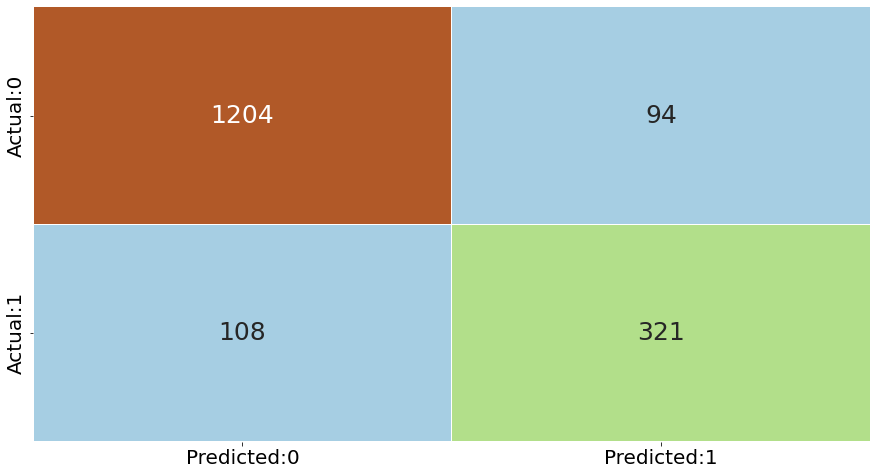

In [50]:

#defining the size of the canvas
plt.rcParams['figure.figsize'] = [15,8]
#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1',], index = ['Actual:0','Actual:1',])
#plotting the confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [52]:
#accuracy score
accuracy_score(y_test,pred)


0.8830341632889404

In [53]:
#building confusion matrix
cm = confusion_matrix(y_test, pred)
cm

array([[1204,   94],
       [ 108,  321]])

In [54]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

    negative       0.92      0.93      0.92      1298
    positive       0.77      0.75      0.76       429

    accuracy                           0.88      1727
   macro avg       0.85      0.84      0.84      1727
weighted avg       0.88      0.88      0.88      1727



## ** As we you can see above we have plotted the confusion matrix for predicted sentiments and actual sentiments (negative and positive)
SVM Classifier gives us the accuracy score i.e 88% precision scores according to the classification report.

The confusion matrix shows the TP,TN,FP,FN for sentiments(negative, positive)**